In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.metrics import r2_score
from io import StringIO
import glob
import os
import raytracing as rt
from scipy.ndimage import gaussian_filter

import scipy.optimize as spo
import scipy.constants as spc
import scipy.integrate as spi
import scipy.linalg as spl
import scipy.signal as spsi
import scipy.stats as spst

In [74]:
def lire_csv(chemin_fichier):
    """
    Lecture d'un fichier CSV avec une première ligne à ignorer,
    et renvoie un DataFrame pandas.

    Args:
        chemin_fichier (str): Le chemin d'accès vers le fichier CSV.

    Returns:
        pandas.DataFrame: Un DataFrame pandas contenant les données du fichier CSV.
    """
    # Lire le fichier en ignorant la première ligne
    with open(chemin_fichier, 'r', encoding='utf-8') as fichier:
        lignes = fichier.readlines()[1:]  # Ignorer la première ligne
    
    # Préparer le contenu transformé
    contenu_transforme = []
    for ligne in lignes:
        partie_gauche, _, partie_droite = ligne.partition(', ')  # Séparer à la première virgule
        partie_gauche, partie_droite = partie_gauche.replace(',', '.'), partie_droite.replace(',', '.')   # Au cas où, mais devrait être inutile ici
        ligne_transformee = partie_gauche + ';' + partie_droite
        contenu_transforme.append(ligne_transformee)
    
    # Convertir le contenu transformé en un objet StringIO
    contenu_csv = StringIO(''.join(contenu_transforme))
    
    # Lire le contenu transformé en DataFrame
    df = pd.read_csv(contenu_csv, names=['Pixels', 'Value'],sep=";")
    return df

## Données de la partie 1

In [75]:
df_partie_1 = pd.read_excel("Projet_final.xlsx", sheet_name="Partie 1")


In [76]:
volume = df_partie_1[r"Volume solution ajoutée (ml)"]
mu_2d = df_partie_1[r"2D \mu"]
mu_3d = df_partie_1[r"3D \mu"]
sigma_3d = df_partie_1[r"3D \sigma"]
ln_intensity = df_partie_1[r"2D ln(I_0/I)"]
sigma_ln_intensity = df_partie_1[r"2D \sigma \ln(I_0/I)"]

## Données de la partie 2

In [77]:
df_partie_2 = pd.read_excel("Projet_final.xlsx", sheet_name="Partie 2")

doigt1_mu = df_partie_2["doigt 1 (plus gros)"][1:5]
doigt1_sigma = df_partie_2["Unnamed: 3"][1:5]
doigt2_mu = df_partie_2["doigt 2"][1:5]
doigt2_sigma = df_partie_2["Unnamed: 5"][1:5]
doigt3_mu = df_partie_2["doigt 3"][1:5]
doigt3_sigma = df_partie_2["Unnamed: 7"][1:5]
doigt4_mu = df_partie_2["doigt 4 (plus petit)"][1:5]
doigt4_sigma = df_partie_2["Unnamed: 9"][1:5]

## Données de la partie 3

In [78]:
# Partie 3 a
df_partie_3a = pd.read_excel("Projet_final.xlsx", sheet_name="Partie 3a")

p3a_ms = df_partie_3a["ms"]
p3a_shutter_speed = df_partie_3a["shutter speed (fps)"]
p3a_mu = df_partie_3a["mu (ln(I_0/I))"]
p3a_sigma = df_partie_3a["sigma"]

# Partie 3 b
df_partie_3b = pd.read_excel("Projet_final.xlsx", sheet_name="Partie 3b")

p3b_bruit = df_partie_3b["bruit (%)"][1:8]
p3b_mu_B = df_partie_3b["mu_B"][1:8]
p3b_sigma_B = df_partie_3b["sigma_B"][1:8]
p3b_cone_clair_mu = df_partie_3b["Cône clair"][1:8]
p3b_cone_clair_cnr = df_partie_3b["Unnamed: 5"][1:8]
p3b_cone_sombre_mu = df_partie_3b["Cône clair"][1:8]
p3b_cone_sombre_cnr = df_partie_3b["Unnamed: 8"][1:8]

## Données de la partie 4 

### Données axe x

In [79]:
# Données 2D
partie4_2d_x = lire_csv(r"partie_4\partie4_2d_x.csv")

# Données avec filtre Ramlack
partie4_3d_040_025_ramlack_x = lire_csv(r"partie_4/partie4_3d_040_025_ramlack_x.csv")
partie4_3d_040_025_ramlack_x_v2 = lire_csv(r"partie_4\partie4_3d_040_025_ramlack_x_v2.csv")
partie4_3d_160_025_ramlack_x = lire_csv(r"partie_4\partie4_3d_160_025_ramlack_x.csv")

# Influence de la résolution : 0,25 ; 0,50 ; 2,00
partie4_3d_320_025_x = lire_csv(r"partie_4\partie4_3d_320_025_x.csv")
partie4_3d_320_050_x = lire_csv(r"partie_4\partie4_3d_320_050_x.csv")
partie4_3d_320_200_x = lire_csv(r"partie_4\partie4_3d_320_200_x.csv")

### Données axe y

In [80]:
# Données 2D
partie4_2d_y = lire_csv(r"partie_4\partie4_2d_y.csv")

# Données avec filtre Ramlack
partie4_3d_040_025_ramlack_y_v2 = lire_csv(r"partie_4\partie4_3d_040_025_ramlack_y_v2.csv")
partie4_3d_040_025_ramlack_y = lire_csv(r"partie_4\partie4_3d_040_025_ramlack_y.csv")
partie4_3d_160_025_ramlack_y = lire_csv(r"partie_4\partie4_3d_160_025_ramlack_y.csv")

# Données avec diaphragme
partie4_3d_320_025_dia050_y = lire_csv(r"partie_4\partie4_3d_320_025_dia050_y.csv")
partie4_3d_320_025_dia150_y = lire_csv(r"partie_4\partie4_3d_320_025_dia150_y.csv")

# Données sans filtre
partie4_3d_320_025_nofilter_y = lire_csv(r"partie_4\partie4_3d_320_025_nofilter_y.csv")

# Influence de la résolution : 0,25 ; 0,50 ; 2,00
partie4_3d_320_025_y = lire_csv(r"partie_4\partie4_3d_320_025_y.csv")
partie4_3d_320_050_y = lire_csv(r"partie_4\partie4_3d_320_050_y.csv")
partie4_3d_320_200_y = lire_csv(r"partie_4\partie4_3d_320_200_y.csv")

In [81]:
def normalisation(dataframe):
    """Fonction qui normalise les dataframes.

    Args:
        dataframe (DataFrame)

    Returns:
        DataFrame: Dataframe normalisé.
    """
    return (dataframe-min(dataframe))/np.ptp(dataframe)

In [82]:
def figure_plot_p4(df):
    mpl.plot(df["Pixels"], normalisation(df["Value"]),color="k")
    mpl.ylabel("Intensité normalisé [-]")
    mpl.xlabel("Position [Pixel]")
    mpl.legend(frameon=False) 
    mpl.tick_params(axis='both', which='both', direction='in')
    mpl.minorticks_on()
    mpl.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


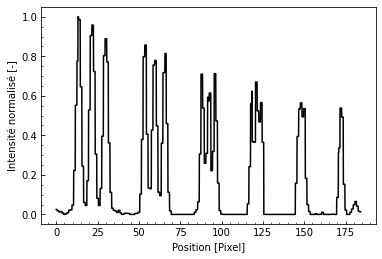

In [83]:
figure_plot_p4(partie4_3d_160_025_ramlack_y)

## Données de la partie 5

In [84]:
p5_2d_320_025_bas = lire_csv(r"partie 5\2d_320_025_bas.csv")
p5_2d_320_025_haut = lire_csv(r"partie 5\2d_320_025_haut.csv")
p5_2d_320_025_milieu = lire_csv(r"partie 5\2d_320_025_milieu.csv")
p5_3d_040_025_bas = lire_csv(r"partie 5\3d_040_025_bas.csv")
p5_3d_040_025_haut = lire_csv(r"partie 5\3d_040_025_haut.csv")
p5_3d_040_025_milieu = lire_csv(r"partie 5\3d_040_025_milieu.csv")
p5_3d_160_025_bas = lire_csv(r"partie 5\3d_160_025_bas.csv")
p5_3d_160_025_haut = lire_csv(r"partie 5\3d_160_025_haut.csv")
p5_3d_160_025_milieu = lire_csv(r"partie 5\3d_160_025_milieu.csv")
p5_3d_320_025_bas = lire_csv(r"partie 5\3d_320_025_bas.csv")
p5_3d_320_025_haut = lire_csv(r"partie 5\3d_320_025_haut.csv")
p5_3d_320_025_milieu = lire_csv(r"partie 5\3d_320_025_milieu.csv")
p5_3d_320_025_dia050 = lire_csv(r"partie 5\3d_320_025_dia050.csv")
p5_3d_320_025_dia100 = lire_csv(r"partie 5\3d_320_025_dia100.csv")
p5_3d_320_025_dia150 = lire_csv(r"partie 5\3d_320_025_dia150.csv")
p5_3d_320_050_bas = lire_csv(r"partie 5\3d_320_050_bas.csv")
p5_3d_320_050_haut = lire_csv(r"partie 5\3d_320_050_haut.csv")
p5_3d_320_050_milieu = lire_csv(r"partie 5\3d_320_050_milieu.csv")
p5_3d_320_200_bas = lire_csv(r"partie 5\3d_320_200_bas.csv")
p5_3d_320_200_haut = lire_csv(r"partie 5\3d_320_200_haut.csv")
p5_3d_320_200_milieu = lire_csv(r"partie 5\3d_320_200_milieu.csv")